## Fabrica de bombons

Problema do cliente é a variabilidade do processo, diferentes valores das variáveis causam impactos na produção:
    
    "Estamos tendo dificuldade para modelar nosso processo industrial. As diferentes variáveis de processo impactam de maneira diferente o peso final dos bombons, além de introduzir diferentes níveis de incerteza no processo. Não estamos conseguindo lidar com esta incerteza."





In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


In [29]:
df = pd.read_excel('registros-prod.xlsx')

In [30]:
df.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822


Neste dataframe temos 1 variável categórica, que é representado pela coluna VAR_2 e 3 variáveis contínuas (QTD_CHOC,VAR_1 e PESO_BOMBOM)



In [31]:
print('Quantidade de observações {}'.format(df.shape[0]))

Quantidade de observações 500


## Análise descritiva

Verificando se há dados faltantes:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
QTD_CHOC       500 non-null float64
VAR_1          500 non-null float64
VAR_2          500 non-null object
PESO_BOMBOM    500 non-null float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [33]:
df.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


Para variáveis categóricas, a melhor maneira de visualizar é utilizando gráficos de barras, e com isso podemos analisar da melhor maneira a distribuição das categorias.
E com isso podemos observar que temos muito mais a categoria C e poucas da categoria A



In [34]:
total_classe = df.VAR_2.value_counts()
total_classe

C    177
B    165
A    158
Name: VAR_2, dtype: int64

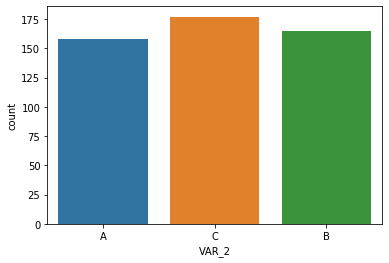

In [35]:
sns.countplot(df.VAR_2)

Há mais bombons da classe C, depois com a classe B e menos bombons da classe A.

Text(0.5, 1.0, 'Distribuição da quantidade de chocolate')

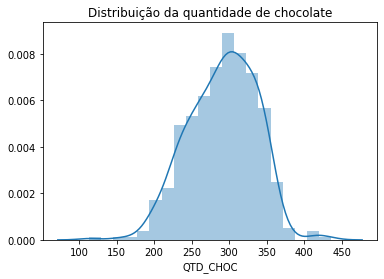

In [36]:
ax = sns.distplot(df['QTD_CHOC'])
ax.set_title('Distribuição da quantidade de chocolate')

Pode-se observar que a maioria da quantidade de chocolate está entre aproximadamente 250 e 350.

Text(0.5, 1.0, 'Distribuição da variável 1')

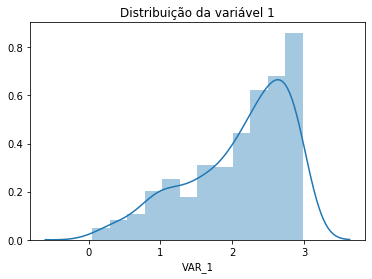

In [37]:
ax = sns.distplot(df['VAR_1'])
ax.set_title('Distribuição da variável 1')


Analisando a variável 1 para cada classe da variável 2

Text(0.5, 1.0, 'Distribuição da variável 1 na classe A')

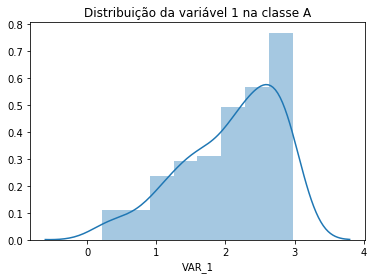

In [38]:
ax = sns.distplot(df[df.VAR_2=='A']['VAR_1'])
ax.set_title('Distribuição da variável 1 na classe A')


Text(0.5, 1.0, 'Distribuição da variável 1 na classe B')

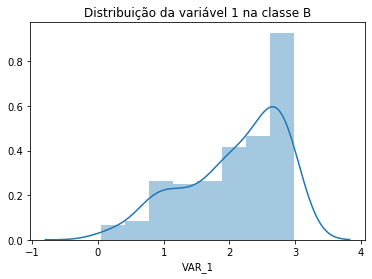

In [39]:
ax = sns.distplot(df[df.VAR_2=='B']['VAR_1'])
ax.set_title('Distribuição da variável 1 na classe B')


Text(0.5, 1.0, 'Distribuição da variável 1 na classe C')

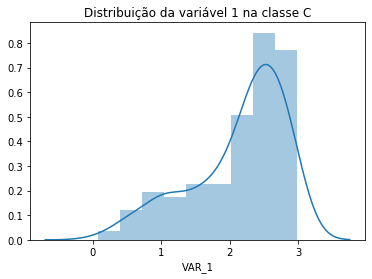

In [40]:
ax = sns.distplot(df[df.VAR_2=='C']['VAR_1'])
ax.set_title('Distribuição da variável 1 na classe C')


Podemos notar que com o atributo "var_1" temos um enviesamento à direita, ou seja há muitos dados concentrados na direita do gráfico ou entre 2 e 3.

Text(0.5, 1.0, 'Distribuição dos pesos dos bombons')

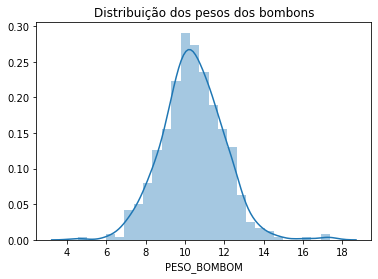

In [41]:
ax = sns.distplot(df['PESO_BOMBOM'])
ax.set_title('Distribuição dos pesos dos bombons')

Text(0.5, 1.0, 'Distribuição dos pesos do bombom na classe A')

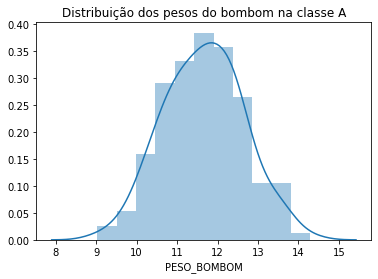

In [42]:
ax = sns.distplot(df[df.VAR_2=="A"]['PESO_BOMBOM'])
ax.set_title('Distribuição dos pesos do bombom na classe A')

Pode-se notar que na classe A tem muitos bombons acima do peso, o que gera um alto custo de produção.

Text(0.5, 1.0, 'Distribuição dos pesos do bombom na classe B')

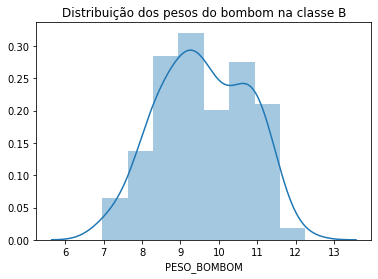

In [43]:
ax = sns.distplot(df[df.VAR_2=="B"]['PESO_BOMBOM'])
ax.set_title('Distribuição dos pesos do bombom na classe B')

Text(0.5, 1.0, 'Distribuição dos pesos do bombom na classe C')

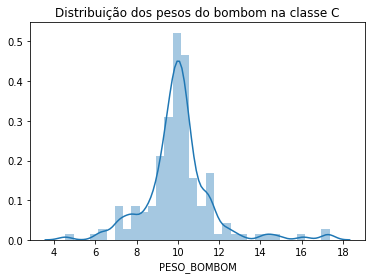

In [44]:
ax = sns.distplot(df[df.VAR_2=="C"]['PESO_BOMBOM'])
ax.set_title('Distribuição dos pesos do bombom na classe C')

Text(0.5, 1.05, 'Disperção entre as variaveis quantidade de chocolate e a variável 1')

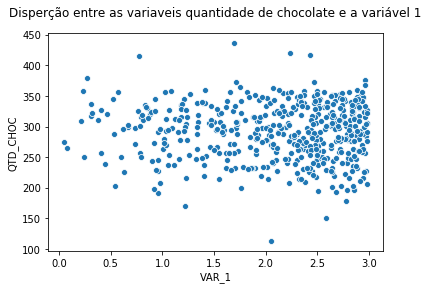

In [45]:
ax = sns.scatterplot(x = df.VAR_1,y=df.QTD_CHOC)
ax.set_title('Disperção entre as variaveis quantidade de chocolate e a variável 1',y=1.05)

Ao que parece as variáveis "VAR_1" e "QTD_CHOC" não tem correlação, portanto uma variável não implica no valor da outra



Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1')

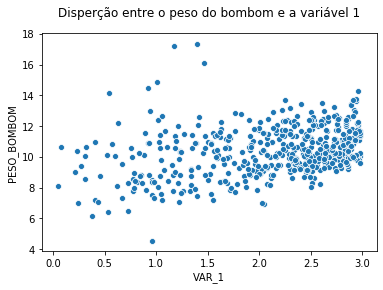

In [46]:
ax = sns.scatterplot(x = df.VAR_1,y=df.PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1',y=1.05)


Text(0.5, 1.05, 'Disperção entre as variaveis')

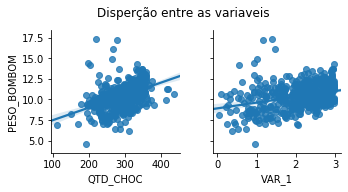

In [47]:
ax = sns.pairplot(df,y_vars='PESO_BOMBOM',x_vars=['QTD_CHOC','VAR_1'],kind='reg')
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Podemos perceber que o peso dos bombons e a quantidade de chocolate pode ter uma correlação positiva fraca, e o mesmo com a variável 1 e o peso dos bombons. Mas aí fica a questão: será que a quantidade de chocolate influencia no peso final do bombom?


## Análise diagnóstica

Para entender melhor os dados, vou visualizar a distribuição da quantidade de observações por classe, quando a nossa observação tiver um peso >9, ou seja não foram descartados

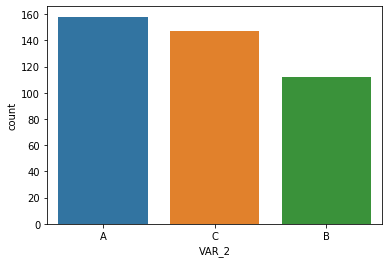

In [48]:
sns.countplot(df[df.PESO_BOMBOM>=9].VAR_2)

A classe A é o que mais temos bombons que não foram descartados por serem não-conforme

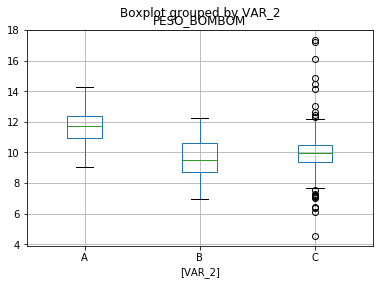

In [49]:
#box_plot_data=[value1,value2,value3,value4]
df.boxplot(['PESO_BOMBOM'],by=['VAR_2'])


Grande parte dos bombons que estão acima do peso, ou seja maior que 10,estão na categoria A, então teria um custo de produção grande. Será que parte do custo de produção estão nas classes A?


Vamos visualizar agora os bombons que tem uma qualidade boa, ou seja, não foram descartados e não geraram um grande custo de produção.

In [50]:
total_classe

C    177
B    165
A    158
Name: VAR_2, dtype: int64

In [51]:
total = df.VAR_2.value_counts().sum()
classe_a = total_classe[2]
classe_b = total_classe[1]
classe_c = total_classe[0]
porcent_a = (classe_a *100)/total
porcent_b = (classe_b *100)/total
porcent_c = (classe_c *100)/total


In [52]:
print('A classe A produz {}% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.'.format(porcent_a))
print('A classe B produz {}% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.'.format(porcent_b))
print('A classe C produz {}% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.'.format(porcent_c))



A classe A produz 31.6% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.
A classe B produz 33.0% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.
A classe C produz 35.4% de bombons com custo de produção baixo, em relação ao total de bombons produzidos.


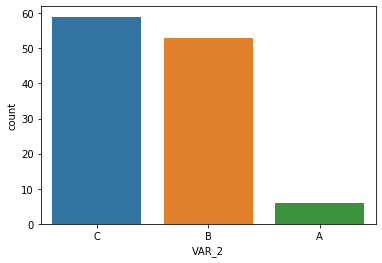

In [53]:
sns.countplot(df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].VAR_2)

A Classe C foi a classe que mais teve bombons que não teve muito custo de produção, seguido pela classe B.
E pode-se notar que a classe A foi a que menos gerou bombons com um custo de produção baixo. Mas vale ressaltar que de toda a produção de bombons feita, a classe A representa 31,6% da produção de bombons, ou seja teve menos bombons produzidos em comparação com outras classes



In [54]:
df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].VAR_2.value_counts()


C    59
B    53
A     6
Name: VAR_2, dtype: int64

Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 quando não há um alto custo de produção')

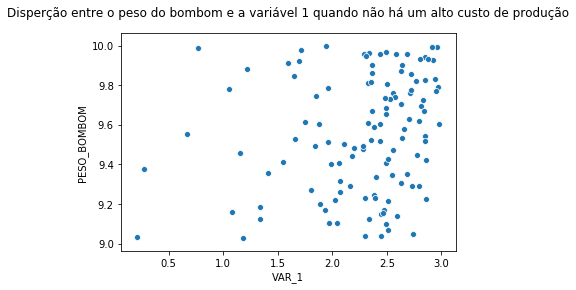

In [55]:
ax = sns.scatterplot(x = df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].VAR_1,y=df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 quando não há um alto custo de produção',y=1.05)




Text(0.5, 1.05, 'Disperção entre o peso do bombom e a quantidade de chocolate quando não há um alto custo de produção')

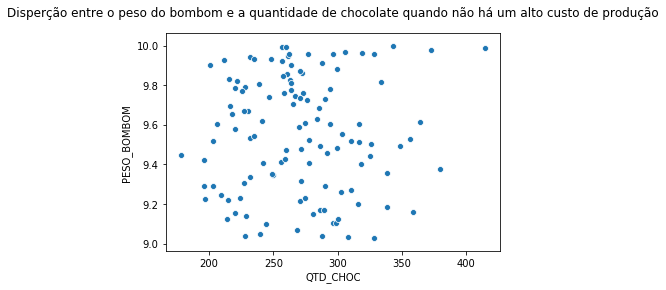

In [56]:
ax = sns.scatterplot(x = df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].QTD_CHOC,y=df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a quantidade de chocolate quando não há um alto custo de produção',y=1.05)




Text(0.5, 1.05, 'Disperção entre a quantidade de chocolate e a variável 1 quando não há um alto custo de produção')

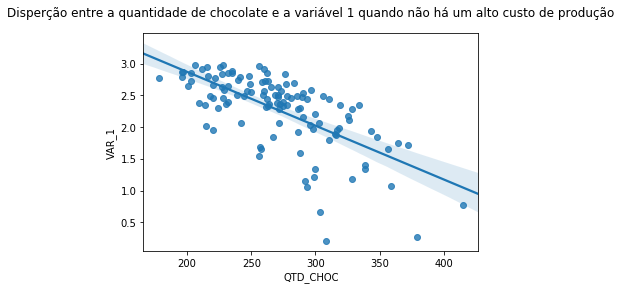

In [57]:
ax = sns.regplot(x = df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].QTD_CHOC,y=df[(df.PESO_BOMBOM>=9)&(df.PESO_BOMBOM<=10)].VAR_1)
ax.set_title('Disperção entre a quantidade de chocolate e a variável 1 quando não há um alto custo de produção',y=1.05)




Com este gráfico podemos enxergar uma linha que está descendo, ou seja conseguimos visualizar uma relação negativa entre a quantidade da variável 1 e a quantidade de chocolate, ou seja, quanto maior for a quantidade de chocolate utilizada na produção de bombons, menor tem que ser o valor da variável 1 



### Mas será que a classe A é a que mais gera um alto custo na hora de produzir bombons?

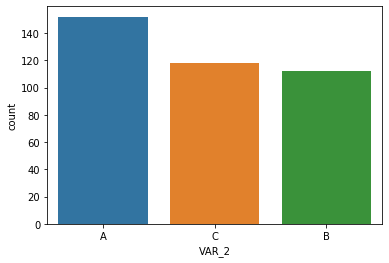

In [58]:
sns.countplot(df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].VAR_2)

O quanto que essa produção de bombons com custo de produção elevado representa na produção total de bombons dessas classes?

In [59]:
custo_elevado = df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].VAR_2.value_counts()
custo_elevado
total_custo_elevado = custo_elevado.sum()

In [60]:
custo_elevado_a = (custo_elevado[0]*100)/total_classe[2]
custo_elevado_b = (custo_elevado[2]*100)/total_classe[1]
custo_elevado_c = (custo_elevado[1]*100)/total_classe[0]
print('A produção de bombons com custo elevado da classe A, representa {}% no total de produção de bombons desta classe'.format(custo_elevado_a))

print('A produção de bombons com custo elevado da classe B, representa {}% no total de produção de bombons desta classe'.format(custo_elevado_b))

print('A produção de bombons com custo elevado da classe C, representa {}% no total de produção de bombons desta classe'.format(custo_elevado_c))



A produção de bombons com custo elevado da classe A, representa 96.20253164556962% no total de produção de bombons desta classe
A produção de bombons com custo elevado da classe B, representa 67.87878787878788% no total de produção de bombons desta classe
A produção de bombons com custo elevado da classe C, representa 66.66666666666667% no total de produção de bombons desta classe


### Será que a quantidade de chocolate influencia no peso final do bombom?

In [61]:
df.corr()


,QTD_CHOC,VAR_1,PESO_BOMBOM
QTD_CHOC,1.000000,-0.029062,0.437217
VAR_1,-0.029062,1.000000,0.316657
PESO_BOMBOM,0.437217,0.316657,1.000000


O peso do bombom tem uma relação fraca positiva com a quantidade de chocolate, tendo também uma relação fraca positiva com a VAR_1


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a quantidade de chocolate na classe A')

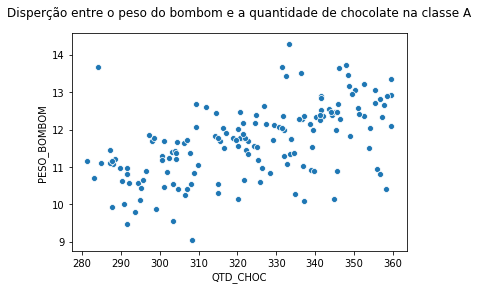

In [62]:
ax = sns.scatterplot(x = df[df.VAR_2=='A'].QTD_CHOC,y=df[df.VAR_2=='A'].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a quantidade de chocolate na classe A',y=1.05)


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a quantidade de chocolate na classe B')

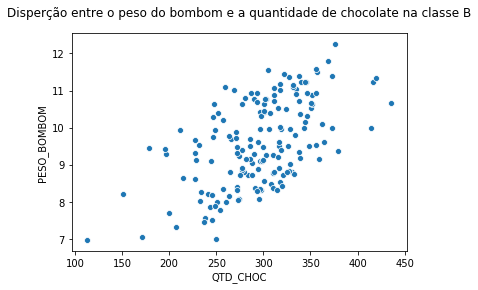

In [63]:
ax = sns.scatterplot(x = df[df.VAR_2=='B'].QTD_CHOC,y=df[df.VAR_2=='B'].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a quantidade de chocolate na classe B',y=1.05)


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a quantidade de chocolate na classe C')

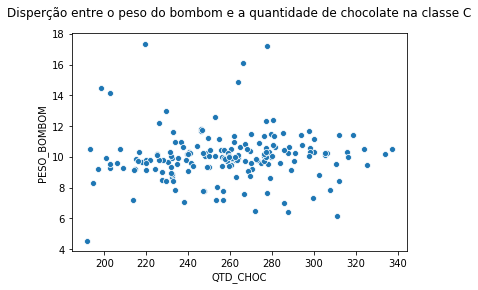

In [64]:
ax = sns.scatterplot(x = df[df.VAR_2=='C'].QTD_CHOC,y=df[df.VAR_2=='C'].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a quantidade de chocolate na classe C',y=1.05)


### A variável Var_1 tem uma correlação fraca positiva no peso dos bombons, mas o quanto que ela tem impacto nos bombons que tem custo de produção alto?



Qual seria a variável que pode gerar um alto custo de produção?
Será que tem alguma variável que pode influenciar no peso do chocolate nessas condições?


In [65]:
df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].corr()


,QTD_CHOC,VAR_1,PESO_BOMBOM
QTD_CHOC,1.000000,0.172933,0.451612
VAR_1,0.172933,1.000000,0.404161
PESO_BOMBOM,0.451612,0.404161,1.000000


A o valor da correlação da variável 1 aumentou muito comparado com o primeiro calculo que fizemos, e o peso do chocolate também aumentou.

E podemos começar a notar que tem uma possivel relação entre a variável 1 e a quantidade do chocolate.

Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 quando há um alto custo de produção')

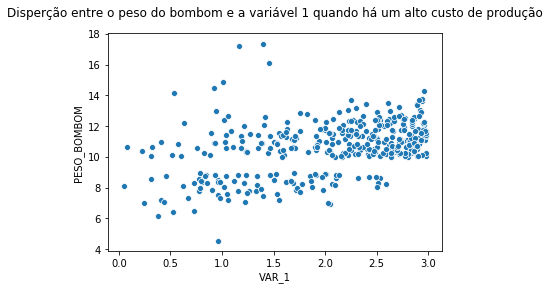

In [66]:
ax = sns.scatterplot(x = df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].VAR_1,y=df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 quando há um alto custo de produção',y=1.05)


Text(0.5, 1.0, 'Distribuição da variável 1 quando temos alto custo na produção do bombom')

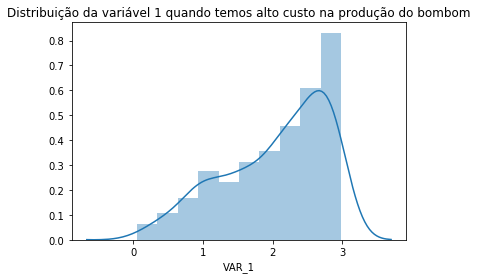

In [67]:
ax = sns.distplot(df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)]['VAR_1'])
ax.set_title('Distribuição da variável 1 quando temos alto custo na produção do bombom')


E como essa variável se comporta na classe A , que mais produz bombons com alto custo?



In [68]:
alto_custo = (df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)

Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe A quando há um alto custo de produção')

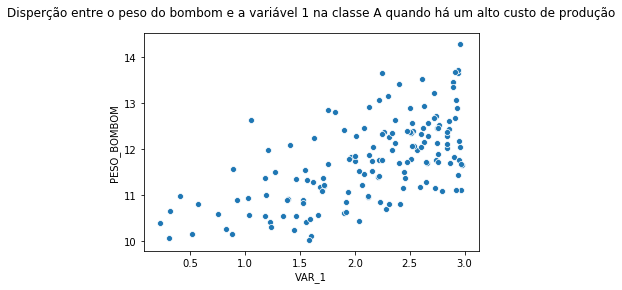

In [69]:
ax = sns.scatterplot(x = df[alto_custo & (df.VAR_2=='A')].VAR_1,y=df[alto_custo & (df.VAR_2=='A')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe A quando há um alto custo de produção',y=1.05)


Pode-se notar que possivelmente a variável 1 influência nos valores do peso do bombom na classe A, ou seja conforme aumenta o valor da variável 1 aumenta o peso do bombom




Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe B quando há um alto custo de produção')

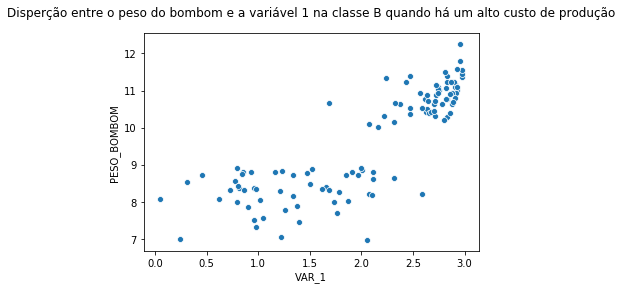

In [70]:
ax = sns.scatterplot(x = df[alto_custo & (df.VAR_2=='B')].VAR_1,y=df[alto_custo & (df.VAR_2=='B')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe B quando há um alto custo de produção',y=1.05)


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe C quando há um alto custo de produção')

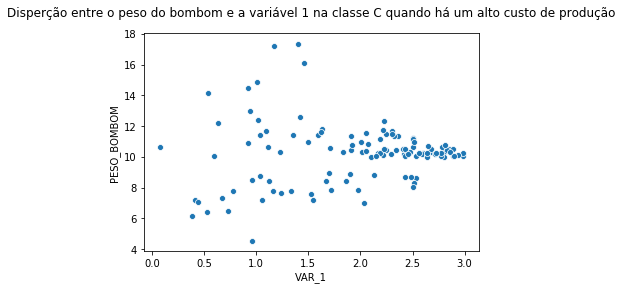

In [71]:
ax = sns.scatterplot(x = df[alto_custo & (df.VAR_2=='C')].VAR_1,y=df[alto_custo & (df.VAR_2=='C')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe C quando há um alto custo de produção',y=1.05)


Podemos notar que na classe C, os valores da variável 1 não tem uma influência direta no pesos dos bombons

In [72]:
alto_custo_qtd_chocolate = (df.QTD_CHOC<9)|(df.QTD_CHOC>10)

Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe A quando há um alto custo de produção')

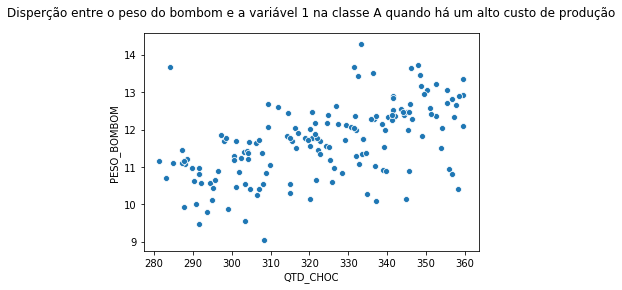

In [73]:
ax = sns.scatterplot(x = df[alto_custo_qtd_chocolate & (df.VAR_2=='A')].QTD_CHOC,y=df[alto_custo_qtd_chocolate & (df.VAR_2=='A')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe A quando há um alto custo de produção',y=1.05)


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe B quando há um alto custo de produção')

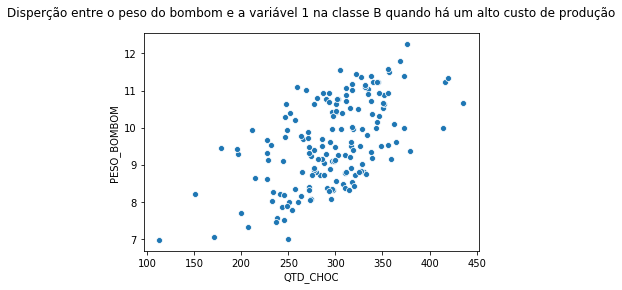

In [74]:
ax = sns.scatterplot(x = df[alto_custo_qtd_chocolate & (df.VAR_2=='B')].QTD_CHOC,y=df[alto_custo_qtd_chocolate & (df.VAR_2=='B')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe B quando há um alto custo de produção',y=1.05)


Text(0.5, 1.05, 'Disperção entre o peso do bombom e a variável 1 na classe C quando há um alto custo de produção')

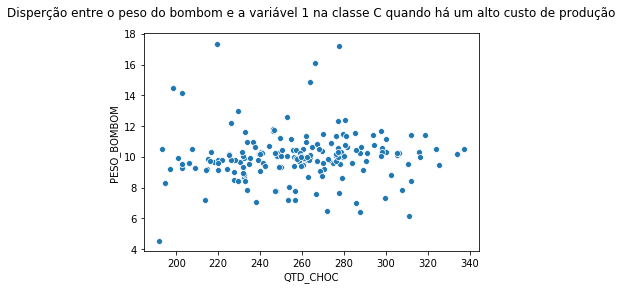

In [75]:
ax = sns.scatterplot(x = df[alto_custo_qtd_chocolate & (df.VAR_2=='C')].QTD_CHOC,y=df[alto_custo_qtd_chocolate & (df.VAR_2=='C')].PESO_BOMBOM)
ax.set_title('Disperção entre o peso do bombom e a variável 1 na classe C quando há um alto custo de produção',y=1.05)


### Esses bombons produzidos com grande custo estão seguindo a descoberta que tivemos? Ou seja quando aumenta a quantidade de chocolate, o valor da variável 1 é diminuida?


Text(0.5, 1.05, 'Disperção entre o e a variável 1 quando há um alto custo de produção')

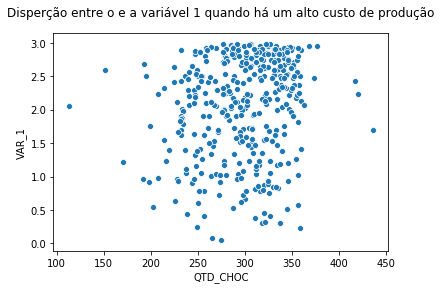

In [76]:
ax = sns.scatterplot(x = df[alto_custo].QTD_CHOC,y=df[alto_custo].VAR_1)
ax.set_title('Disperção entre o e a variável 1 quando há um alto custo de produção',y=1.05)


Já conseguimos ver que não, nesses casos de alto custo na produção dos bombons os valores das variáveis 1 e a quantidade de chocolate não é inversamente proporcional



Com todas essas análises pode-se presumir que:
    - A classe A é a que mais produz bombons com custo alto, onde pode-se concluir que a quantidade de chocolate utilizada tem uma relação forte positiva com o peso do bombom, ou seja conforme ela aumenta o peso do bombom aumenta, o que pode gerar um alto custo de produção, além da quantidade de chocolate utilizada que é muito maior do que é usada em outras classes.
    Recomenda-se diminuir a quantidade de chocolate utilizada.
    - É necessário controlar os valores entre a variável 1 e a quantidade de chocolate utilizada, pois conforme nas análises feitas nos casos de custo de produção baixo, conforme aumenta o valor da variável 1 a quantidade de chocolate precisa ser baixa, e se a quantidade de chocolate for alta, o valor da variável 1 precisa ser baixa.
    Por exemplo: Para casos em que a quantidade de chocolate é 200, pode-se usar como valor para a "variável 1" 3.0, já em casos que a quantidade de chocolate é maior que 350 precisa-se usar o valor da "variável 1" menor que 1.0
    

## Análise preditiva

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

##### Pré processamento

In [78]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

In [79]:
def pre_processing(dataframe, coluna):
    #integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    x = pd.DataFrame(enc.fit_transform(dataframe[[coluna]]))
    dataframe = dataframe.join(x)
    return dataframe
    #dataframe[coluna].replace({'A':1,'B':2,'C':3}, inplace=True)



In [80]:
df_processing = pre_processing(df,'VAR_2')
df_processing.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,0,1,2
0,320.15,0.88,A,10.144919,1.0,0.0,0.0
1,320.14,1.55,A,11.547027,1.0,0.0,0.0
2,284.85,2.97,A,11.112109,1.0,0.0,0.0
3,263.92,2.36,C,9.900123,0.0,0.0,1.0
4,276.22,2.98,C,10.079822,0.0,0.0,1.0


In [81]:
df_processing.columns

Index(['QTD_CHOC', 'VAR_1', 'VAR_2', 'PESO_BOMBOM', 0, 1, 2], dtype='object')

In [82]:
X = df_processing[['QTD_CHOC','VAR_1',0,1,2]]
y = df_processing['PESO_BOMBOM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [83]:
X_test.shape

(150, 5)

In [84]:
X_train.shape

(350, 5)

In [85]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
modelo.intercept_

6.050108496258074

In [87]:
index = ['Intercept','QTD_CHOC','VAR_1',0,1,2]
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index,columns=['Parametros'])

,Parametros
Intercept,6.050108
QTD_CHOC,0.010009
VAR_1,0.688127
0,0.942242
1,-0.855118
2,-0.087124


Interpretação:

1. Intercept ==> Excluindo os efeitos de X(QTD_CHOC, VAR_1 e VAR_2), o efeito médio do peso do chocolate é de 6.050108.

2. QTD_CHOC ==> Mantendo os valores constantes de X3 (VAR_1) e das variáveis categóricas (0,1 e 2), com aumento de 1 grama, gera uma variação de 0.010009 no peso do chocolate.

3. VAR_1 ==> Mantendo os valores de X2 (QTD_CHOC) e e das variáveis categóricas (0,1 e 2) contantes, com o aumento de 1 da variável 1, gera uma variação de 0.688127 no peso do chocolate.

4. 0 ==> Mantendo os valores de X2(QTD_CHOC), X3(VAR_1) e das variáveis categóricas (1 e 2) constantes, o fato da variável ser classificado como classe A gera uma variação de 0.942242 no peso do chocolate.

5. 1 ==> Mantendo os valores de X2(QTD_CHOC), X3(VAR_1) e das variáveis categóricas (0 e 2) constantes, o fato da variável ser classificado como classe B gera uma variação de -0.855118 no peso do chocolate.

6. 2 ==> Mantendo os valores de X2(QTD_CHOC), X3(VAR_1) e das variáveis categóricas (0 e 1) constantes, o fato da variável ser classificado como classe B gera uma variação de -0.087124 no peso do chocolate.



In [88]:
y_predict_train = modelo.predict(X_test)

Text(0, 0.5, 'Peso do chocolate - Real')

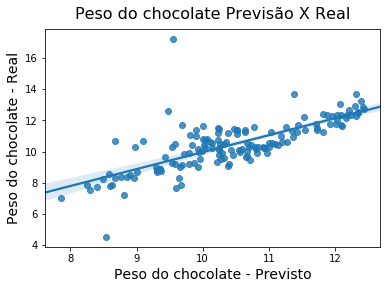

In [89]:
ax = sns.regplot(x = y_predict_train,y=y_test)
ax.set_title('Peso do chocolate Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Peso do chocolate - Previsto", fontsize=14)
ax.set_ylabel("Peso do chocolate - Real", fontsize=14)

Pelo gráfico pode-se notar que o modelo errou bem pouco

In [90]:
MSE = metrics.mean_squared_error(y_test,y_predict_train).round(2)
print('Valor do MSE (Mean square Error): {}'.format(MSE))

Valor do MSE (Mean square Error): 1.12


In [91]:
print("R quadrado = {}".format(modelo.score(X_train,y_train).round(2)))

R quadrado = 0.46


### Predição do peso do bombom

In [92]:
df_test = pd.read_excel('analise-preditiva.xlsx')

In [93]:
df_test.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,A,11.733068
1,257.27,1.97,B,9.125734
2,353.16,2.64,A,12.343947
3,317.78,2.76,A,12.072388
4,248.10,2.63,C,10.256106


In [94]:
df_test = pre_processing(df_test, 'VAR_2')

In [95]:
df_test.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,0,1,2
0,286.63,2.72,A,11.733068,1.0,0.0,0.0
1,257.27,1.97,B,9.125734,0.0,1.0,0.0
2,353.16,2.64,A,12.343947,1.0,0.0,0.0
3,317.78,2.76,A,12.072388,1.0,0.0,0.0
4,248.10,2.63,C,10.256106,0.0,0.0,1.0


In [96]:
X = df_test[['QTD_CHOC',"VAR_1",0,1,2]]
y_predict_train = modelo.predict(X)

In [97]:
y_predict_train

array([11.73306782,  9.12573449, 12.34394691, 12.07238754, 10.25610559,
       10.65306347,  9.71314131, 12.19826524,  9.78651765, 10.24500707,
        9.98724121,  9.91259941, 10.28578133,  9.23055232,  9.59288735,
       10.55419464, 10.15124186, 10.09557084,  9.84587134,  9.44731498,
       10.35205334,  9.55135915, 11.42096516, 10.56239041,  8.04103897,
       10.6101112 , 10.03899767, 10.59688083,  9.63862559, 12.18569   ,
       10.1081256 ,  9.82371173, 10.63363342, 10.28166943,  9.40423615,
        9.67034323, 11.597824  ,  9.7272871 , 10.95321681, 11.74752513,
        9.76010226, 11.6723458 , 11.17859608, 10.74917953,  9.31165013,
        9.3898382 , 12.52558965,  8.71371218, 10.71400089,  9.28117087])

In [98]:
df_test['PESO_BOMBOM'] = y_predict_train
df_test.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,0,1,2
0,286.63,2.72,A,11.733068,1.0,0.0,0.0
1,257.27,1.97,B,9.125734,0.0,1.0,0.0
2,353.16,2.64,A,12.343947,1.0,0.0,0.0
3,317.78,2.76,A,12.072388,1.0,0.0,0.0
4,248.10,2.63,C,10.256106,0.0,0.0,1.0


In [99]:
df_test[['QTD_CHOC','VAR_1','VAR_2','PESO_BOMBOM']].to_excel('analise-preditiva.xlsx', index=False)

## Análise prescritiva

In [100]:
df_prescritiva = pd.read_excel('analise-prescritiva.xlsx')

In [101]:
df_prescritiva.head()

,QTD_CHOC,VAR_1,VAR_2
0,NaN,2.07,C
1,NaN,2.94,B
2,NaN,2.53,B
3,NaN,2.19,B
4,NaN,2.02,C
